In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing Dataset from Kaggle

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.shape

(1338, 7)

In [6]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#Cheching for NUlL values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# now plotting the Distribution PLot

In [10]:
sns.set()

C:\Users\91744\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


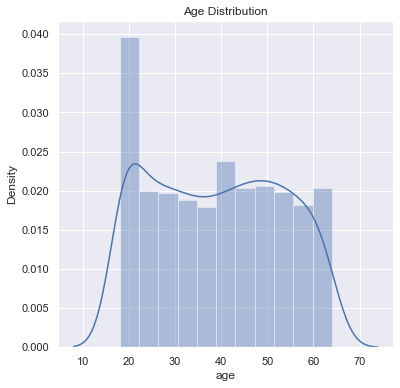

In [11]:
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

# now creating bar Plot

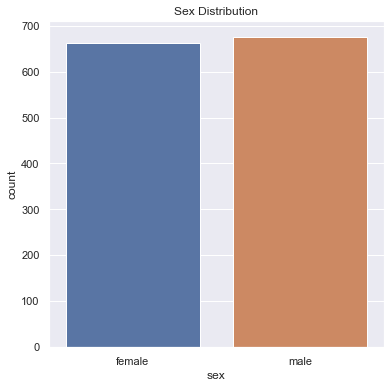

In [12]:
plt.figure(figsize = (6,6))
sns.countplot( x = "sex", data = df)
plt.title('Sex Distribution')
plt.show()

In [13]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

# Distribution for BMI

C:\Users\91744\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


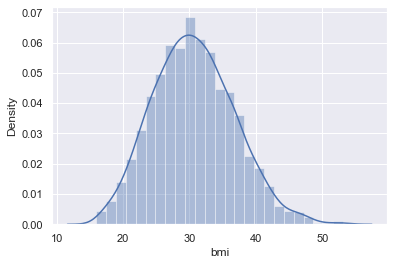

In [14]:
sns.distplot(df['bmi'])
plt.show()

# Checking Information of each region

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# NOW Replacong Text Values into Numerical Values

In [16]:
df.replace({"sex":{'male':0,'female':1}},inplace=True)

In [17]:
df.replace({"smoker":{'yes':0,'no':1}},inplace =True)

In [18]:
df.replace({"region":{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

# Now Splitting the Dependant ans Independent Features

In [19]:
X = df.drop(columns= "charges",axis=1)
y = df['charges']

In [20]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Now Performing Train Test split 

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [23]:
X_train.shape

(1070, 6)

In [24]:
X_test.shape

(268, 6)

# Performing LinearRegression 

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(X_train,y_train)

LinearRegression()

# Now Training and Predictin score time 

In [27]:
training_data_prediction = reg.predict(X_train)
r2_train = metrics.r2_score(y_train,training_data_prediction)

r2_train

In [28]:
r2_train

0.7472874142596659

In [29]:
test_data_prediction = reg.predict(X_test)
r2_test = metrics.r2_score(y_test,test_data_prediction)

In [30]:
r2_test

0.7596124937457933

# Now Creating Sample Data

In [37]:
# Input the data age sex bmi children smoker region
sample_input_data = (25,0,22.7,0,1,0)


In [38]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [39]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [40]:
prediction = reg.predict(input_data_reshaped)

C:\Users\91744\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
print("The insurance cost is ",prediction)

The insurance cost is  [783.09392712]
